<h3><b>PRÁCTICA 3 :: Relaciones difusas / razonamiento aproximado</b></h3>
Autor: Claudio Morales Díaz  // INACAP Puente Alto. (Chile, 2020)

In [1]:
#Comentar de esta parte en caso de no usar "Google Colab"
# from google.colab import drive
# drive.mount('/content/drive/')

In [2]:
# Comentar de esta parte en caso de no usar "Google Colab"
# Se añade la librería "fuzzy", copiando el fichero previamente
# Si existen errores posteriormente -> "Reiniciar entorno de ejecución"
import sys
# sys.path.append('/content/drive/MyDrive/Colab Notebooks/')

# Necesitaremos la librería "fuzzy"
from fuzzy import *

In [3]:
# Librerías requeridas
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 5) Relaciones difusas
Ejemplo de aplicación del <b>producto cartesiano</b> usando la librería "fuzzy.py"

In [4]:
#
# Función cartesian(): Relación cartesiana difusa.
# Argumentos:
#   mA: numpy.ndarray, Vector con valores de pertenencia de xA
#   mB: numpy.ndarray, Vector con valores de pertenencia de xB
# Retorna:
#   AxB: Matriz de relación (mínimo)
#
x = np.array([0, 0.1, 0.5, 0.8, 1, 1])
y = np.array([0.8, 0.8, 0.9, 1])
cartesian(x, y)

array([[0. , 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, 0.1],
       [0.5, 0.5, 0.5, 0.5],
       [0.8, 0.8, 0.8, 0.8],
       [0.8, 0.8, 0.9, 1. ],
       [0.8, 0.8, 0.9, 1. ]])

#### Ejemplo: relación entre 2 conjuntos difusos mediante el producto cartesiano
A = Venta (moderada) de libros / B = Diversidad de la oferta

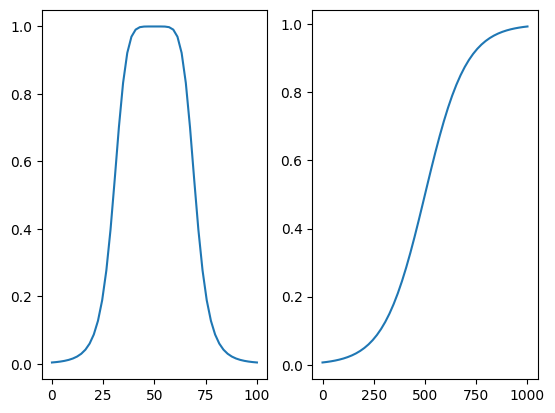

(0.0, 1.0)

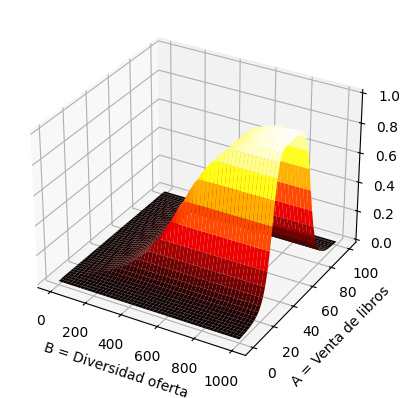

In [5]:
# Representación del Conjunto A (Venta de libros) como función "campana de Bell generalizada"
xA = np.linspace(0, 100, 50)
mA = gbellmf(xA, [20, 3, 50])
plt.subplot(121)
plt.plot(xA, mA)

# Representación del Conjunto B (Diversidad de la oferta) como función sigmoide
xB = np.linspace(0, 1000, 50)
mB = sigmf(xB, [0.01, 500])
plt.subplot(122)
plt.plot(xB, mB)

plt.show()

# Representación en 3D del producto cartesiano
AxB = cartesian(mA, mB)
A, B = np.meshgrid(xA, xB, indexing='ij')

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection='3d')
ax.plot_surface(B, A, AxB, cmap=plt.cm.hot)
ax.set_xlabel("B = Diversidad oferta")
ax.set_ylabel("A = Venta de libros")
ax.set_zlim(0, 1)

Ejemplo de aplicación de la <b>composición</b> usando la librería "fuzzy.py"

In [6]:
# Función compose(): Composición difusa max-min.
# Argumentos:
#   mRA: numpy.ndarray, vector o matriz de relación A
#   mRB: numpy.ndarray, Matriz de relación B
# Retorna:
#   AoB: Matriz de composición max-min
#
x = np.array([[0.4, 1.0, 0.2],
              [0.1, 0.0, 0.5],
              [0.9, 0.7, 0.8]])
y = np.array([[1.0, 0.6, 0.5, 0.4, 0.0],
              [0.4, 0.8, 0.7, 0.3, 0.3],
              [0.5, 1.0, 0.5, 0.2, 0.8]])
compose(x, y)

array([[0.4, 0.8, 0.7, 0.4, 0.3],
       [0.5, 0.5, 0.5, 0.2, 0.5],
       [0.9, 0.8, 0.7, 0.4, 0.8]])

#### Ejemplo: operación de composición entre 3 conjuntos difusos

(0.0, 1.0)

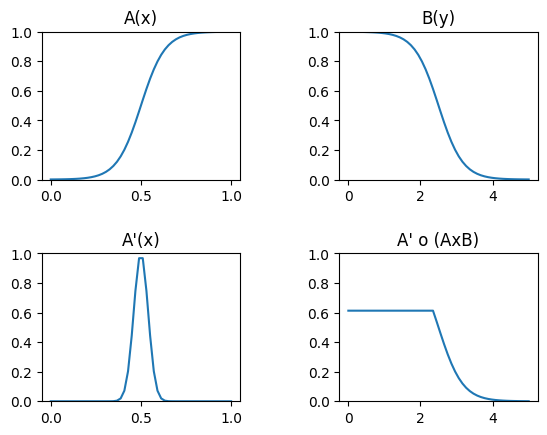

<Figure size 640x480 with 0 Axes>

In [7]:
# Universo de discurso para x e y
x = np.linspace(0, 1, 50)
y = np.linspace(0, 5, 50)

# Funciones de membresía A(x) y B(y)
A = sigmf(x, [15, 0.5])
plt.subplot(221)
plt.title('A(x)')
plt.ylim((0, 1))
plt.plot(x, A)

B = sigmf(y, [-3, 2.5])
plt.subplot(222)
plt.title('B(y)')
plt.ylim((0, 1))
plt.plot(y, B)

# Producto cartesiano: AxB
AxB = cartesian(A, B)
A, B = np.meshgrid(x, y, indexing='ij')

# Función de membresía A'(x)
Ap = gaussmf(x, [0.04, 0.5])
plt.subplot(223)
plt.title("A'(x)")
plt.ylim((0, 1))
plt.plot(x, Ap)

# Composición: A' * (AxB)
Bp = compose(Ap, AxB)
plt.subplot(224)
plt.title("A' o (AxB)")
plt.ylim((0, 1))
plt.plot(y, Bp)

plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Producto cartesiano en 3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(A, B, AxB, cmap=plt.cm.hot)
ax.set_zlim(0, 1)

## 6) Razonamiento impreciso


<h3>1. Definición de variables linguisticas</h3>
<ul>
<li><h4><b>Ejercicio: </b>Ejemplo de definición de variables linguisticas</h4></li>
<li><h4>Definimos la variable linguistica <b>X = Posesión del balón</b></h4></li></ul>

[]

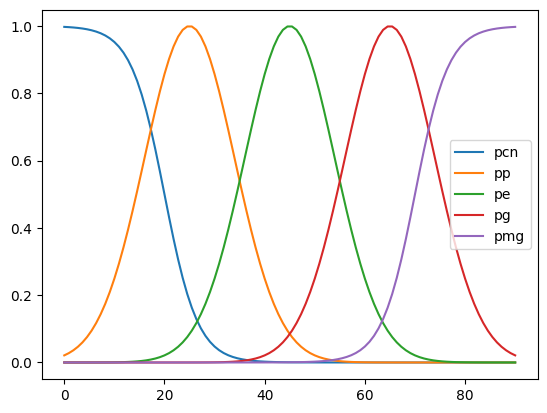

In [8]:
# Ejemplo resuelto: definición de variables linguisticas
# Definimos la variable linguistica X: Posesión del balón

# 1. Se define el universo de discurso para x, entre 0 y 90 minutos
x = np.linspace(0, 90, 100)

# 2. Se definen los valores linguisticos para x
# Posesión del balón: {casi nada, poco, equilibrado, grande, muy grande}
pcn = sigmf(x, [-0.3, 20])  # casi nada
pp = gaussmf(x, [9, 25])  # poco
pe = gaussmf(x, [9, 45])  # equilibrado
pg = gaussmf(x, [9, 65])  # grande
pmg = sigmf(x, [0.3, 70])  # muy grande

# 3. Graficamos para ver la forma de las funciones de membresía
plt.plot(x, pcn, label='pcn')
plt.plot(x, pp, label='pp')
plt.plot(x, pe, label='pe')
plt.plot(x, pg, label='pg')
plt.plot(x, pmg, label='pmg')
plt.legend()
plt.plot()

<h3>2. Reglas "Si-Entonces"</h3>
<ul>
<li><h4><b>Ejemplo</b>: Regla "Si estudio mucho, entonces soy excelente estudiante"</h4></li>
</ul>

In [9]:
# Se definen los valores linguisticos:
x = np.linspace(0, 8, 50)  # Universo de discurso para horas diarias de estudio
y = np.linspace(1, 10, 50)  # Universo de discurso para promedio de notas
mA = sigmf(x, [2, 2])  # Función de membresía "estudio mucho"
mB = sigmf(y, [3, 7.5])  # Función de membresía "excelente estudiante"

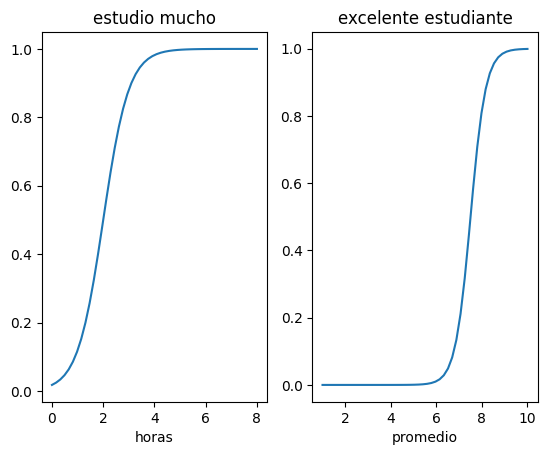

In [10]:
# Graficamos para conocer la funciones
plt.subplot(1, 2, 1)
plt.title("estudio mucho")
plt.xlabel("horas")
plt.plot(x, mA)
plt.subplot(1, 2, 2)
plt.title("excelente estudiante")
plt.xlabel("promedio")
plt.plot(y, mB)
plt.show()

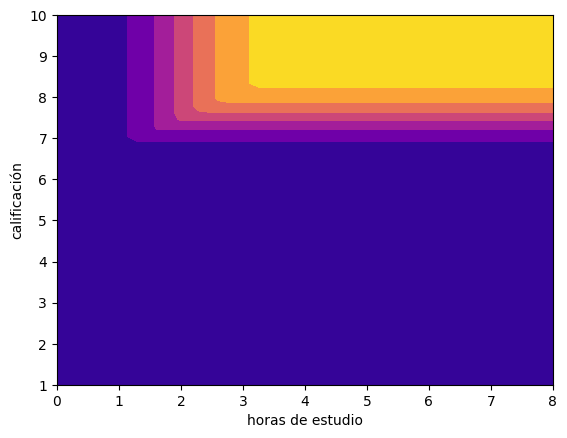

In [11]:
# La relación A x B se define por la función cartesian()
R = cartesian(mA, mB)

# representamos como contorno
A, B = np.meshgrid(x, y, indexing='ij')
plt.contourf(A, B, R, cmap=plt.cm.plasma)
plt.xlabel('horas de estudio')
plt.ylabel('calificación')
plt.show()

<h4>3. Modus Ponens difuso</h4>

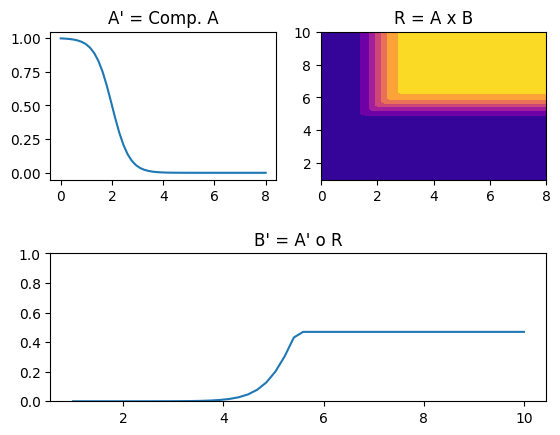

In [12]:
# Se definen los valores linguisticos:
x = np.linspace(0, 8, 50)  # horas diarias de estudio
y = np.linspace(1, 10, 50)  # rango de calificaciones
mA = sigmf(x, [3, 2])  # Función de membresía "estudia mucho"
mB = sigmf(y, [3, 5.5])  # Función de membresía "excelente estudiante"

# Premisa 1: hecho
Ap = Nc(mA)  # Pedro estudia poco (Complemento de "estudia mucho")

plt.subplot(221)
plt.plot(x, Ap)
plt.title("A' = Comp. A")

# Premisa 2: regla "Si estudio mucho, entonces soy excelente estudiante"
R = cartesian(mA, mB)

plt.subplot(222)
A, B = np.meshgrid(x, y, indexing='ij')
plt.contourf(A, B, R, cmap=plt.cm.plasma)
plt.title('R = A x B')

# Conclusión: Bp = compose(Ap, R)
# Inferencia: Pedro tiene una baja pertenencia en el grupo de estudiantes excelentes
Bp = compose(Ap, R)

plt.subplot(212)
plt.plot(y, Bp)
plt.ylim(0, 1)
plt.title("B' = A' o R")
plt.subplots_adjust(hspace=0.5)
plt.show()

<h3><b>EJERCICIO: Modus Ponens difuso</b></h3>
<p>A partir del ejemplo de "Velocidad creciente" y "Gravedad del accidente":
<ol>
<li> Define las funciones de membresía, relacionadas al ejemplo expuesto en la diapositiva 49.
<li> Establece la regla "Si conduce a alta velocidad, el accidente será grave".
<li> Infiere la conclusión del siguiente razonamiento difuso:
 <br>- Hecho: Pedro no conduce a alta velocidad:
 <br>- Regla: "Si conduce a alta velocidad, el accidente será grave".
 <br>- Conclusión:

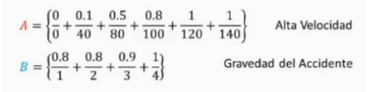

In [13]:
# Escribe aquí tu respuesta

La funcion de membresia para alta velocidad puede ser una sigmoide

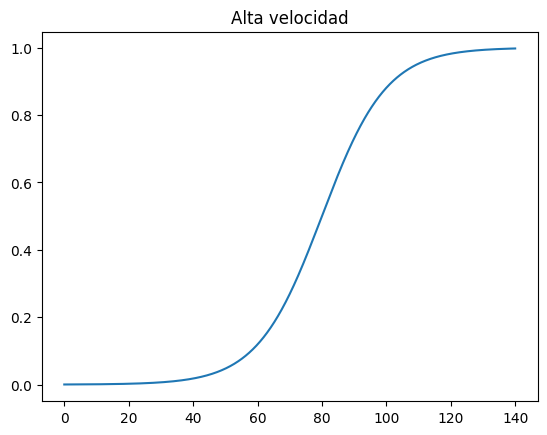

In [14]:
high_speed_discourse_universe = np.linspace(0, 140, 1001)
a, x0 = 0.1, 80
high_speed_membership_function = sigmf(high_speed_discourse_universe, [a, x0])
plt.title("Alta velocidad")
plt.plot(high_speed_discourse_universe, high_speed_membership_function)
plt.show()

La funcion de gravedad del accidente puede ser triangular...

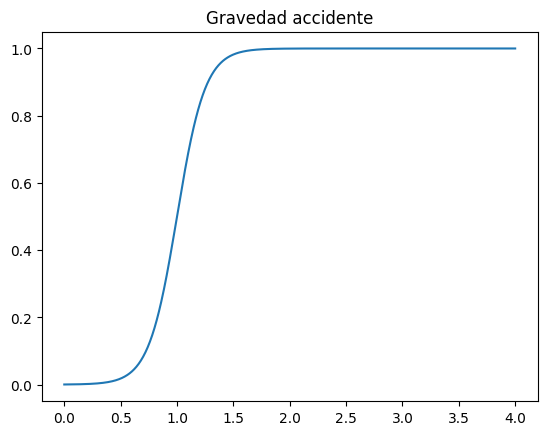

In [15]:
severity_accident_discourse_universe = np.linspace(0, 4, 1001)
severity_accident_a, severity_accident_x0 = 8, 1
severity_accident_membership_function = sigmf(severity_accident_discourse_universe,
                                              [severity_accident_a, severity_accident_x0])
plt.title("Gravedad accidente")
plt.plot(severity_accident_discourse_universe, severity_accident_membership_function)
plt.show()

Producto cartesiano

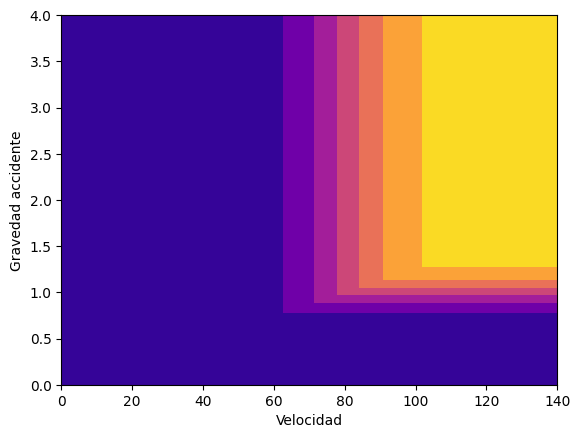

In [16]:
# La relación A x B se define por la función cartesian()
cartesian_product = cartesian(high_speed_membership_function, severity_accident_membership_function)

# representamos como contorno
myA, myB = np.meshgrid(high_speed_discourse_universe, severity_accident_discourse_universe, indexing='ij')
plt.contourf(myA, myB, cartesian_product, cmap=plt.cm.plasma)
plt.xlabel('Velocidad')
plt.ylabel('Gravedad accidente')
plt.show()

 Establece la regla "Si conduce a alta velocidad, el accidente será grave".

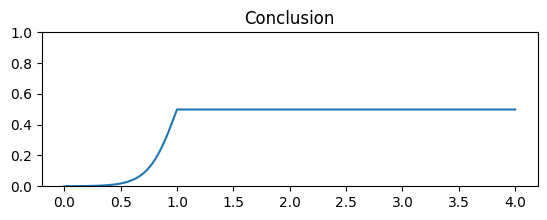

In [17]:
# Premisa 1: hecho
low_speed_membership_function = Nc(high_speed_membership_function) # Pedro no va a alta velocidad

# Premisa 2: regla "Si conduce a alta velocidad, el accidente será grave"
cartesian_product = cartesian(high_speed_membership_function, severity_accident_membership_function)

# Conclusion: pB = compose(Ap, R)
# Inferencia: Tengo una alta probabilidad de tener un accidente grave
composition = compose(low_speed_membership_function, cartesian_product)

plt.subplot(212)
plt.plot(severity_accident_discourse_universe, composition)
plt.ylim(0, 1)
plt.title("Conclusion")

plt.subplots_adjust(hspace=0.4, wspace=0.5)
plt.show()

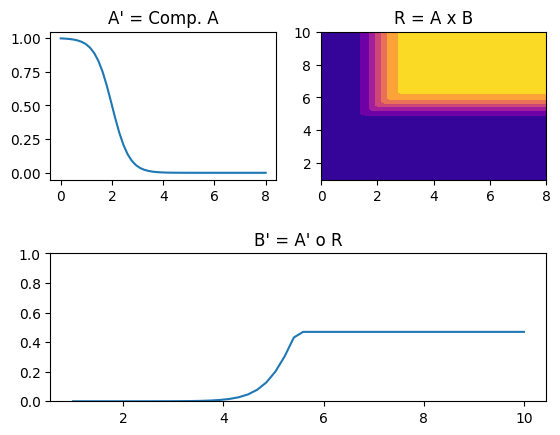

In [18]:
# Se definen los valores linguisticos:
x = np.linspace(0, 8, 50)  # horas diarias de estudio
y = np.linspace(1, 10, 50)  # rango de calificaciones
mA = sigmf(x, [3, 2])  # Función de membresía "estudia mucho"
mB = sigmf(y, [3, 5.5])  # Función de membresía "excelente estudiante"

# Premisa 1: hecho
Ap = Nc(mA)  # Pedro estudia poco (Complemento de "estudia mucho")

plt.subplot(221)
plt.plot(x, Ap)
plt.title("A' = Comp. A")

# Premisa 2: regla "Si estudio mucho, entonces soy excelente estudiante"
R = cartesian(mA, mB)

plt.subplot(222)
A, B = np.meshgrid(x, y, indexing='ij')
plt.contourf(A, B, R, cmap=plt.cm.plasma)
plt.title('R = A x B')

# Conclusión: Bp = compose(Ap, R)
# Inferencia: Pedro tiene una baja pertenencia en el grupo de estudiantes excelentes
Bp = compose(Ap, R)

plt.subplot(212)
plt.plot(y, Bp)
plt.ylim(0, 1)
plt.title("B' = A' o R")
plt.subplots_adjust(hspace=0.5)
plt.show()